         PC1       PC2
0   0.914365 -2.162769
1   0.866350 -2.170359
2   0.827614 -2.131012
3   0.808412 -2.068897
4   0.839467 -2.162049
..       ...       ...
63 -2.429585  0.832941
64 -2.486759  0.867436
65 -2.578565  0.878013
66 -2.610512  0.871766
67 -2.395741  1.142579

[68 rows x 2 columns]


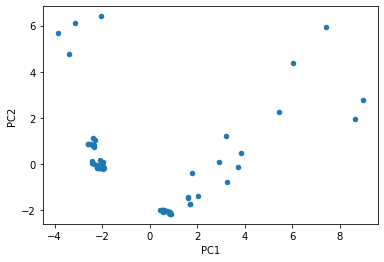

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dataA = pd.read_csv('../5. Dataset PCA/MeterB_pca_all.csv')
dataA_feature = dataA[['PC1','PC2']]
print(dataA_feature)
_ = dataA_feature.plot.scatter(x='PC1',y='PC2')

In [2]:
# scaler = MinMaxScaler()
# scaler.fit(dataA_feature.PC1)
# dataA_feature.PC1 = scaler.transform(dataA_feature.PC1)

# # scaler.fit(dataA_feature['PC2'])
# # dataA_feature['PC2'] = scaler.transform(dataA_feature['PC2'])
# dataA_feature

In [3]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [4]:
y_predict = km.fit_predict(dataA_feature[['PC1','PC2']])
dataA_feature['Cluster'] = y_predict+1
dataA_feature

<ipython-input-4-9ea8584dc15b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataA_feature['Cluster'] = y_predict+1


,PC1,PC2,Cluster
0,0.914365,-2.162769,1
1,0.866350,-2.170359,1
2,0.827614,-2.131012,1
3,0.808412,-2.068897,1
4,0.839467,-2.162049,1
...,...,...,...
63,-2.429585,0.832941,3
64,-2.486759,0.867436,3
65,-2.578565,0.878013,3
66,-2.610512,0.871766,3


In [5]:
km.cluster_centers_

array([[ 1.34184113, -1.55232253],
       [ 7.29910405,  3.45362179],
       [-2.32578043,  0.88792628]])

No handles with labels found to put in legend.


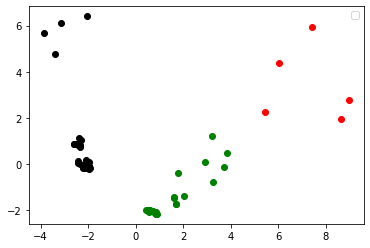

In [6]:
df1 = dataA_feature[dataA_feature.Cluster==1]
df2 = dataA_feature[dataA_feature.Cluster==2]
df3 = dataA_feature[dataA_feature.Cluster==3]
plt.scatter(df1['PC1'],df1['PC2'],color='green')
plt.scatter(df2['PC1'],df2['PC2'],color='red')
plt.scatter(df3['PC1'],df3['PC2'],color='black')
plt.legend()

In [7]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataA_feature[['PC1','PC2']])
    sse.append(km.inertia_)

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
sse

[852.7040712454229,
 455.34503605451965,
 195.85163572524874,
 86.34497052022466,
 42.90875921391625,
 31.346016210936405,
 24.59324724318607,
 18.179846379323305,
 11.427077411572956]

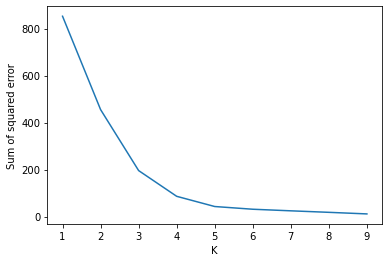

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse) # choose k = 3